In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

https://academic.oup.com/sleep/article/42/12/zsz180/5549536

In [3]:
test_id = open('walch-apple-watch/test_ids.txt', 'r')
train_id = open('walch-apple-watch/train_ids.txt', 'r')
val_id = open('walch-apple-watch/val_ids.txt', 'r')

test_id = test_id.read().split('\n')[:-1]
train_id = train_id.read().split('\n')[:-1]
val_id = val_id.read().split('\n')[:-1]

test = pd.DataFrame()
for i in test_id:
    heartrate = pd.read_csv('walch-apple-watch/heart_rate/'+i+'_heartrate.csv', index_col=False)
    acceleration = pd.read_csv('walch-apple-watch/motion/'+i+'_acceleration.csv', index_col=False)
    labeled_sleep = pd.read_csv('walch-apple-watch/labels/'+i+'_labeled_sleep.csv', index_col=False)
    # remove records with negative timestamps because they do not have labels
    heartrate = heartrate[heartrate["timestamp"] >= 0]
    acceleration = acceleration[acceleration["timestamp"] >= 0]
    
    indices = acceleration["timestamp"].apply(lambda x: heartrate["timestamp"].searchsorted(x))
    acceleration['closest_hr_timestamp'] = heartrate['timestamp'].values[indices - 1]
    grouped_data = acceleration.groupby('closest_hr_timestamp').agg({
        'x': 'mean',
        'y': 'mean',
        'z': 'mean'
    }).reset_index()
    df_final = pd.merge(heartrate, grouped_data, left_on='timestamp', right_on='closest_hr_timestamp', how='left')
    
    indices = df_final["timestamp"].apply(lambda x: labeled_sleep["epoch"].searchsorted(x))
    df_final['labels'] = labeled_sleep['label'].values[indices - 1]
    
    df_final = df_final.dropna()
    df_final = df_final.drop(columns=['closest_hr_timestamp'])
    
    test = pd.concat([test, df_final])

In [4]:
print(test)
test.to_csv('test_data.csv', index=True)

        timestamp    hr         x         y         z  labels
0         1.96583  62.0 -0.400414  0.202381 -0.897284      -1
1         6.96583  62.0 -0.409291  0.199273 -0.893377      -1
2        15.96580  62.0 -0.393097  0.224226 -0.895046      -1
3        21.96583  66.0 -0.371728  0.219617 -0.906034      -1
4        22.96583  67.0 -0.366195  0.156390 -0.919364      -1
...           ...   ...       ...       ...       ...     ...
5654  29620.93379  74.0  0.144599  0.589341 -0.584729      -1
5655  29624.93376  73.0 -0.242116  0.106549 -0.930605      -1
5656  29626.93379  73.0 -0.364146  0.683116 -0.237530      -1
5657  29631.93376  72.0 -0.273410  0.523564 -0.782494      -1
5658  29641.93379  79.0  0.009794  0.497218 -0.467456      -1

[28886 rows x 6 columns]


In [5]:
train = pd.DataFrame()
for i in train_id:
    heartrate = pd.read_csv('walch-apple-watch/heart_rate/'+i+'_heartrate.csv', index_col=False)
    acceleration = pd.read_csv('walch-apple-watch/motion/'+i+'_acceleration.csv', index_col=False)
    labeled_sleep = pd.read_csv('walch-apple-watch/labels/'+i+'_labeled_sleep.csv', index_col=False)
    
    heartrate = heartrate[heartrate["timestamp"] >= 0]
    acceleration = acceleration[acceleration["timestamp"] >= 0]
    
    indices = acceleration["timestamp"].apply(lambda x: heartrate["timestamp"].searchsorted(x))
    acceleration['closest_hr_timestamp'] = heartrate['timestamp'].values[indices - 1]
    grouped_data = acceleration.groupby('closest_hr_timestamp').agg({
        'x': 'mean',
        'y': 'mean',
        'z': 'mean'
    }).reset_index()
    df_final = pd.merge(heartrate, grouped_data, left_on='timestamp', right_on='closest_hr_timestamp', how='left')
    
    indices = df_final["timestamp"].apply(lambda x: labeled_sleep["epoch"].searchsorted(x))
    df_final['labels'] = labeled_sleep['label'].values[indices - 1]
    
    df_final = df_final.dropna()
    df_final = df_final.drop(columns=['closest_hr_timestamp'])
    
    train = pd.concat([train, df_final])

In [6]:
print(train)
train.to_csv('train_data.csv', index=True)

        timestamp    hr         x         y         z  labels
0         5.16105  77.0 -0.865297 -0.071364 -0.464401      -1
1        10.16105  77.0 -0.957725 -0.066915 -0.222599      -1
2        11.16105  78.0 -0.589195 -0.348735 -0.688189      -1
3        20.16102  78.0 -0.542033 -0.346615 -0.763253      -1
4        25.16105  76.0 -0.541780 -0.345169 -0.764195      -1
...           ...   ...       ...       ...       ...     ...
2987  14938.20547  60.0 -0.389303 -0.395061 -0.824638       0
3055  15275.20547  58.0 -0.328065 -0.456537 -0.819937       0
3056  15282.20547  57.0 -0.327746 -0.456712 -0.819730       0
3057  15285.20544  57.0 -0.327662 -0.456762 -0.815776       0
3071  15355.20544  59.0 -0.456532  0.554483 -0.694457       0

[132962 rows x 6 columns]


In [7]:
val = pd.DataFrame()
for i in val_id:
    heartrate = pd.read_csv('walch-apple-watch/heart_rate/'+i+'_heartrate.csv', index_col=False)
    acceleration = pd.read_csv('walch-apple-watch/motion/'+i+'_acceleration.csv', index_col=False)
    labeled_sleep = pd.read_csv('walch-apple-watch/labels/'+i+'_labeled_sleep.csv', index_col=False)
    
    heartrate = heartrate[heartrate["timestamp"] >= 0]
    acceleration = acceleration[acceleration["timestamp"] >= 0]
    
    indices = acceleration["timestamp"].apply(lambda x: heartrate["timestamp"].searchsorted(x))
    acceleration['closest_hr_timestamp'] = heartrate['timestamp'].values[indices - 1]
    grouped_data = acceleration.groupby('closest_hr_timestamp').agg({
        'x': 'mean',
        'y': 'mean',
        'z': 'mean'
    }).reset_index()
    df_final = pd.merge(heartrate, grouped_data, left_on='timestamp', right_on='closest_hr_timestamp', how='left')
    
    indices = df_final["timestamp"].apply(lambda x: labeled_sleep["epoch"].searchsorted(x))
    df_final['labels'] = labeled_sleep['label'].values[indices - 1]
    
    df_final = df_final.dropna()
    df_final = df_final.drop(columns=['closest_hr_timestamp'])
    
    val = pd.concat([val, df_final])

In [8]:
print(val)
# val.to_csv('val_data.csv', index=True)

        timestamp     hr         x         y         z  labels
244    1251.75728   74.0  0.018724 -0.337573 -0.941772       0
245    1255.75731   69.0 -0.013176 -0.179521 -0.982856       0
246    1261.75731   69.0 -0.006925 -0.213558 -0.976247       0
247    1262.75731   69.0 -0.033927 -0.206757 -0.978274       0
248    1267.75731   69.0 -0.077267  0.007596 -0.956442       0
...           ...    ...       ...       ...       ...     ...
4480  23251.21854   85.0  0.326073  0.823985  0.065880      -1
4481  23261.21851   96.0 -0.015718  1.000196  0.102516      -1
4482  23262.21854   96.0 -0.010001  1.000902  0.094026      -1
4483  23267.21854   97.0 -0.410440  0.895001  0.153172      -1
4484  23273.21854  114.0  0.129014  0.279136 -0.555945      -1

[21534 rows x 6 columns]


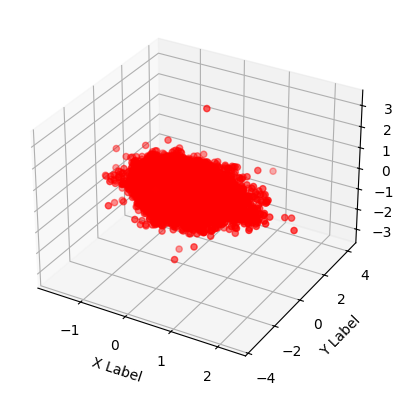